Shape of observations: (4000, 100, 37)
Number of runs: 100
Number of dones: 1
Number of runs with dones: 100
[ 328  257 2047 2047 2047 2047 2047   66  393  106  131  384  767 2047
 2047 2047 2047 2047 2047  267  213 2047 2047   83 2047 2047   74   75
   54  485  135  135  130  416 2047   62 2047 2047 2047 2047  235   74
 2047  203   67   87  120 2047 2047  167 2047  330 2047 2047 2047  333
  506 2047 2047   86 2047  342  460 2047   38 2047 2047 2015  423  356
  361 2047 2047 2047 2047   59  154 2047 1544  268 2047  197  265 2047
 2047   74  473   54   14  536  372 2047   39 2047 2047   58   90    0
 2047 2047]
Full runs (first done > 2000): [ 2  3  4  5  6 13 14 15 16 17 18 21 22 24 25 34 36 37 38 39 42 47 48 50
 52 53 54 57 58 60 63 65 66 67 71 72 73 74 77 80 83 84 91 93 94 98 99]
Number of full runs: 47
Percentage of full runs: 47.00%
Payload shape: (4000, 100, 3)
Payload velocity shape: (4000, 100, 3)
Other quads shape: (4000, 100, 3)
q_pos shape: (4000, 100, 3)
q_rot_mat shape: (40

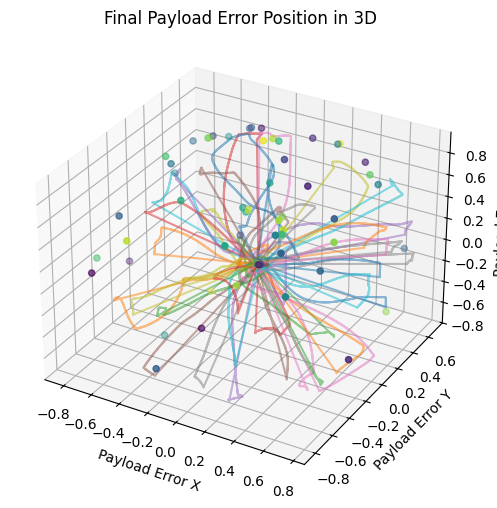

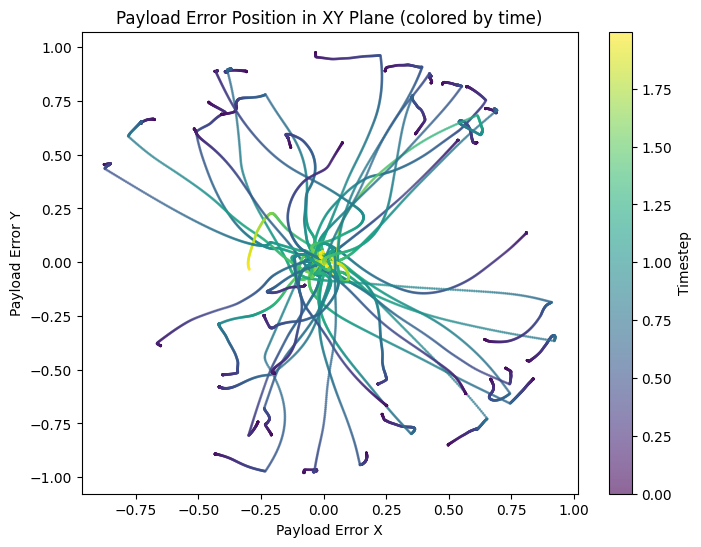

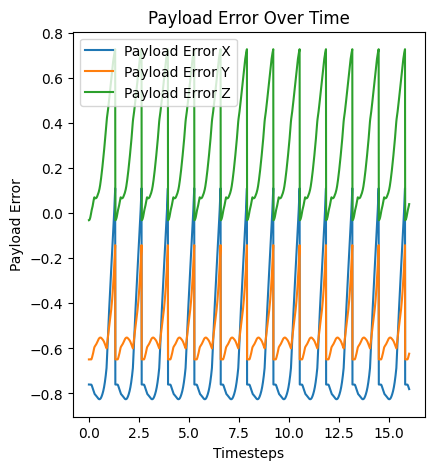

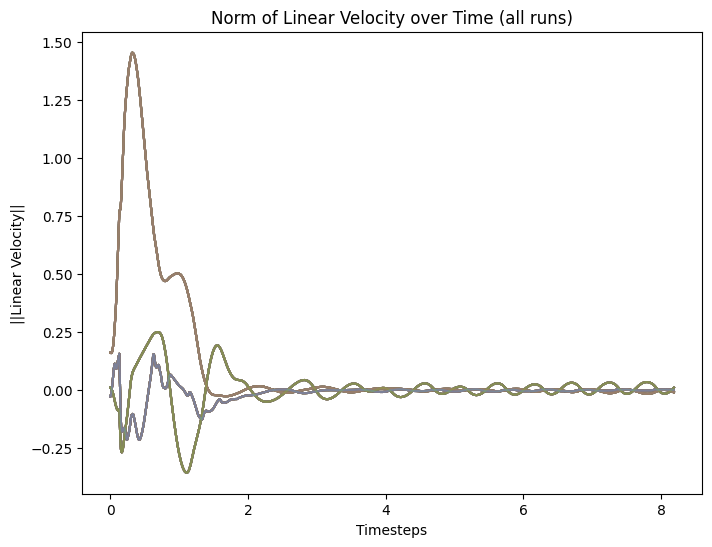

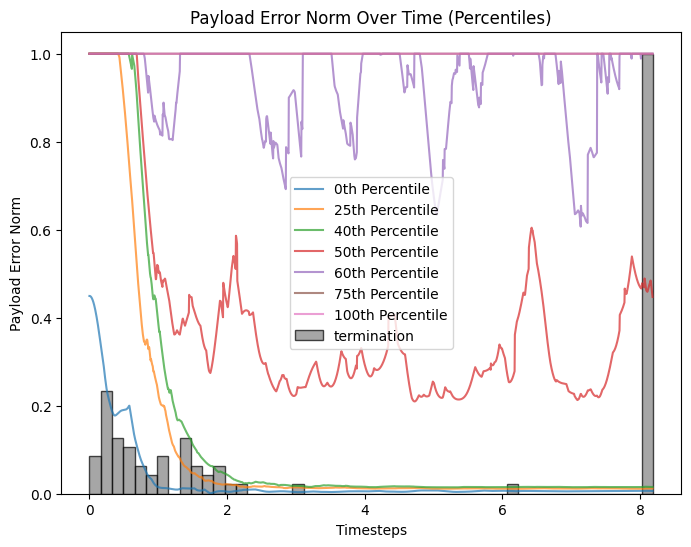

In [83]:
import asdf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D

# Path to your ASDF file
file_path = 'flights.crazy.asdf'

# Load the ASDF file and read the observations into memory
with asdf.open(file_path) as af:
    obs = np.array(af['flights'][0]['agents']['agent_1']['observations'])
    dones = np.array(af['flights'][0]['global']['dones'])
    dt = af['flights'][0]['metadata']['dt']


print("Shape of observations:", obs.shape)



num_runs = 40
#count dones
num_dones = np.sum(dones[0, :])
print(f"Number of runs: {obs.shape[1]}")
print(f"Number of dones: {num_dones}")

# count runs with dones
runs_with_dones = np.sum(np.any(dones, axis=0))
print(f"Number of runs with dones: {runs_with_dones}")


# find index of first done
first_dones = np.argmax(dones,axis=0)
print(first_dones)
full_runs = np.where(first_dones > 2000)[0]
failed_runs = np.where(first_dones <= 2000)[0]
print(f"Full runs (first done > 2000): {full_runs}")

print(f"Number of full runs: {full_runs.shape[0]}")
# print percentage of runs that are full
percentage_full_runs = full_runs.shape[0] / obs.shape[1] *100
print(f"Percentage of full runs: {percentage_full_runs:.2f}%")



#Dynamic ix4 mapping: {'agent_0': [(0, 2), (3, 5), (30, 32), (6, 29), (54, 57)], 'agent_1': [(0, 2), (3, 5), (6, 8), (30, 53), (58, 61)]}
# Extract payload error (X, Y, Z) for the first num_runs environments
timesteps = obs.shape[0]
time = np.arange(timesteps) * dt
payload = obs[:, :, 0:3]  # shape (timesteps, , 3)
payload_velocity = obs[:, :, 3:6]  # shape (timesteps, , 3)
other_quads = obs[:, :, 6:9]  # shape (timesteps, , 3)

#obs_list = [payload_error, payload_linvel, rel, rot, linvel, angvel, linear_acc, angular_acc]
q_pos = obs[:, :, 9:12]  # shape (timesteps, , 3)
q_rot_mat = obs[:, :, 12:21]  # shape (timesteps, , 9)
q_linvel = obs[:, :, 21:24]  # shape (timesteps, , 3)
q_angvel = obs[:, :, 24:27]  # shape (
q_linacc = obs[:, :, 27:30]  # shape (timesteps, , 3)
q_angacc = obs[:, :, 30:33]  # shape (timesteps, , 3)
q_last_action = obs[:, :, 33:36]  # shape (timesteps, num_runs, 3)




print("Payload shape:", payload.shape)
print("Payload velocity shape:", payload_velocity.shape)
print("Other quads shape:", other_quads.shape)
print("q_pos shape:", q_pos.shape)
print("q_rot_mat shape:", q_rot_mat.shape)
print("q_linvel shape:", q_linvel.shape)
print("q_angvel shape:", q_angvel.shape)
print("q_linacc shape:", q_linacc.shape)
print("q_angacc shape:", q_angacc.shape)
print("q_last_action shape:", q_last_action.shape)  





print("linvel:", q_linvel[0,:4,:])
print("angvel:", q_angvel[0,:4,:])

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

print(f"Payload shape (timesteps, runs, dims): {payload.shape}")

# Plot final positions in 3D
final_pos = payload[-1]
xs, ys, zs = final_pos[:, 0], final_pos[:, 1], final_pos[:, 2]
ax.scatter(xs, ys, zs, c=range(final_pos.shape[0]), cmap='viridis', depthshade=True)

# render path
for run in range(num_runs):
    path = payload[:, full_runs[run] , :]  # Extract the path for each run
    ax.plot(path[:, 0], path[:, 1], path[:, 2], alpha=0.5)  # Plot the path
# Set limits for better visualization
ax.set_xlim([np.min(xs), np.max(xs)])
ax.set_ylim([np.min(ys), np.max(ys)])
ax.set_zlim([np.min(zs), np.max(zs)])

# Labels and title
ax.set_xlabel('Payload Error X')
ax.set_ylabel('Payload Error Y')
ax.set_zlabel('Payload Error Z')
ax.set_title('Final Payload Error Position in 3D')

# plot only in xy plane with color based on time
fig2, ax2 = plt.subplots(figsize=(8, 6))

for run in range(num_runs):
    path = payload[:500, full_runs[run], :]
    sc = ax2.scatter(path[:, 0], path[:, 1],
                     c=time[:500],
                     cmap='viridis',
                     s=1,         # smaller point size
                     alpha=0.6)
ax2.set_xlabel('Payload Error X')
ax2.set_ylabel('Payload Error Y')
ax2.set_title('Payload Error Position in XY Plane (colored by time)')
cbar = fig2.colorbar(sc, ax=ax2)
cbar.set_label('Timestep')
# Show the plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(time, payload[:, 0, 0], label='Payload Error X')
plt.plot(time, payload[:, 0, 1], label='Payload Error Y')
plt.plot(time, payload[:, 0, 2], label='Payload Error Z')
plt.xlabel('Timesteps')
plt.ylabel('Payload Error')
plt.title('Payload Error Over Time')
plt.legend()

# Compute the norm of linear velocity at each timestep for each run
linvel_norm = np.linalg.norm(q_linvel, axis=2)  # shape (timesteps, num_runs)

# Plot all runs
fig3, ax3 = plt.subplots(figsize=(8, 6))
for r in range(num_runs):
    end = first_dones[2]
    linvel_norm = np.linalg.norm(q_linvel[:end,2,:], axis=1)
    ax3.plot(time[:end], q_linvel[:end,2,:], alpha=0.3)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('||Linear Velocity||')
ax3.set_title('Norm of Linear Velocity over Time (all runs)')
plt.show()

# plot showing the norm of payload error over time
# show the percentiles of runs
fig4, ax4 = plt.subplots(figsize=(8, 6))
percentiles = [0, 25, 40, 50, 60,  75, 100]
p_error_norm = np.linalg.norm(payload[:2046, : , :], axis=2)  # shape (timesteps, num_runs)
for p in percentiles:
    p_val = np.percentile(p_error_norm, p, axis=1)
    ax4.plot(time[:2046], p_val, label=f'{p}th Percentile', alpha=0.7)
ax4.set_xlabel('Timesteps')
ax4.set_ylabel('Payload Error Norm')
ax4.set_title('Payload Error Norm Over Time (Percentiles)')
 
# crate a line plot of the first dones over time

first_dones_hist, bins = np.histogram(first_dones*dt, bins=50)
ax4.bar(bins[:-1], first_dones_hist/np.max(first_dones_hist), width=np.diff(bins), align='edge', alpha=0.7, label='termination', color='gray', edgecolor='black')

ax4.legend()   


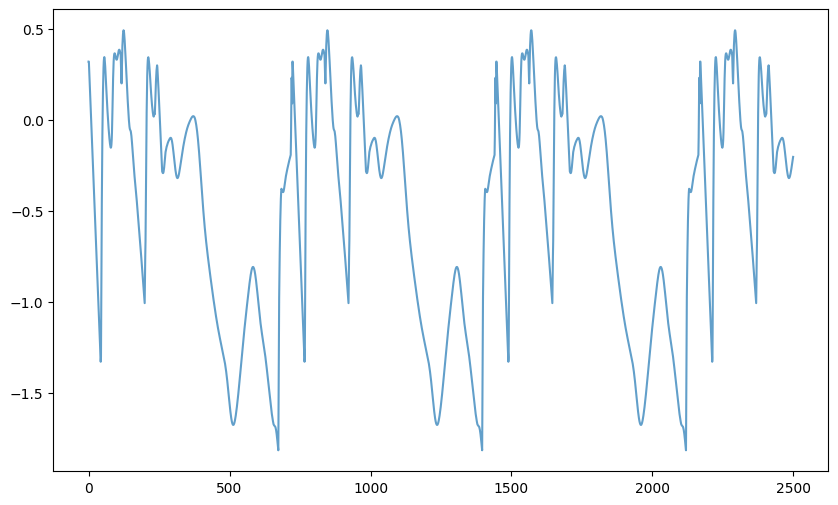

NameError: name 'abs_quad_pos' is not defined

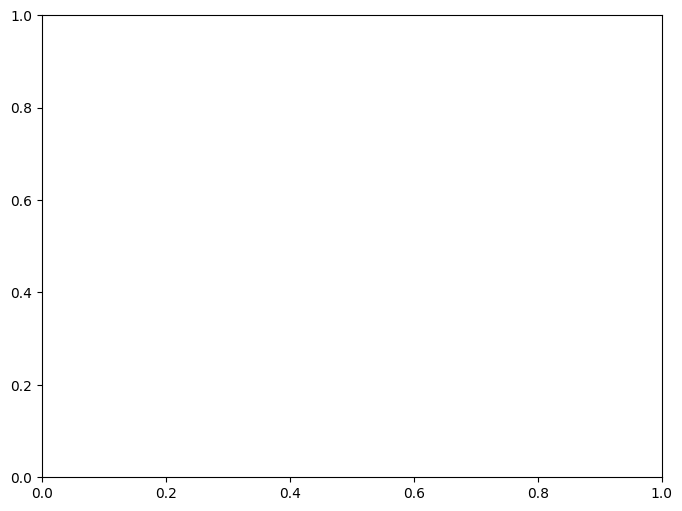